In [1]:
import matplotlib.pyplot as plt
cmap = plt.cm.inferno
import pandas as pd
import os
import numpy as np
import json
import sys
sys.path.append('./geometric-js')
from notebooks.utils import PlotParams
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
plotter = PlotParams()
plotter.set_params()

In [3]:
def get_name(name):
    if name == 'mnist':
        return 'MNIST'
    if name == 'fashion':
        return 'FashionMNIST'
    if name == 'dsprites':
        return 'dSprites'

In [9]:
cmap = plt.cm.cividis

/Users/tommciver/Documents/part-iii/project/geometric-js/lib/python3.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


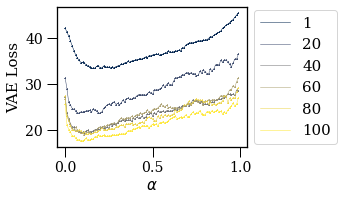

/Users/tommciver/Documents/part-iii/project/geometric-js/lib/python3.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


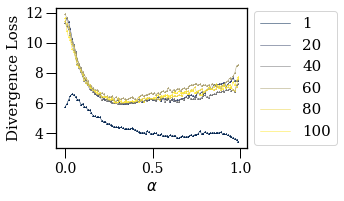

/Users/tommciver/Documents/part-iii/project/geometric-js/lib/python3.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


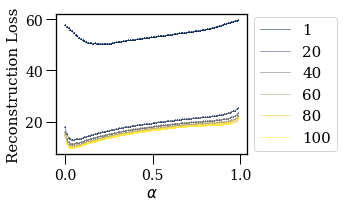

/Users/tommciver/Documents/part-iii/project/geometric-js/lib/python3.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


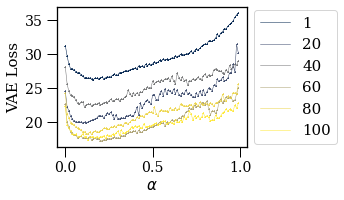

/Users/tommciver/Documents/part-iii/project/geometric-js/lib/python3.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


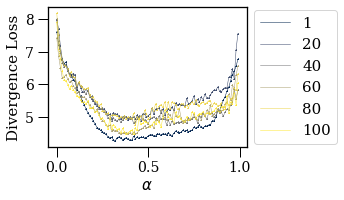

/Users/tommciver/Documents/part-iii/project/geometric-js/lib/python3.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


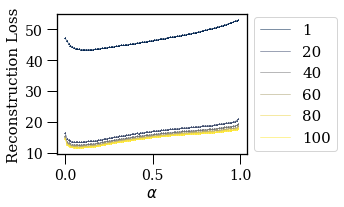

/Users/tommciver/Documents/part-iii/project/geometric-js/lib/python3.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


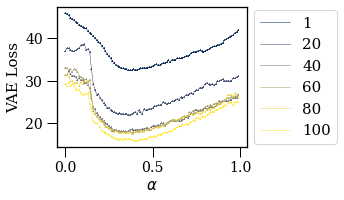

/Users/tommciver/Documents/part-iii/project/geometric-js/lib/python3.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


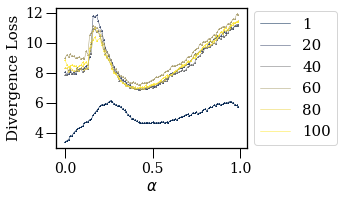

/Users/tommciver/Documents/part-iii/project/geometric-js/lib/python3.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


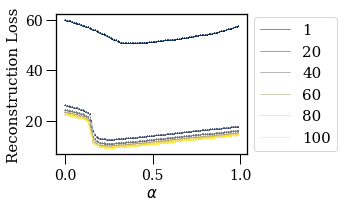

/Users/tommciver/Documents/part-iii/project/geometric-js/lib/python3.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


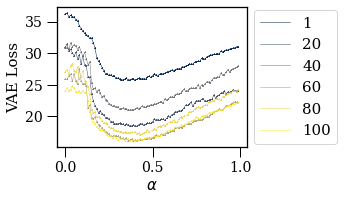

/Users/tommciver/Documents/part-iii/project/geometric-js/lib/python3.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


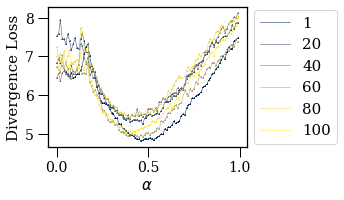

/Users/tommciver/Documents/part-iii/project/geometric-js/lib/python3.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


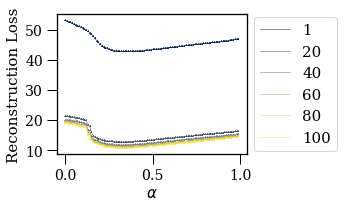

In [37]:
TRAIN_DATA_FOLDER = './gpu-train-results/constant-alpha-lr=0.0001-epochs=100'
DATA_SET = 'mnist'
DIVERGENCE = 'GJS'
LOSS = 'total_loss'
TIGHT_LAYOUT = True
SAVE = True


for DIVERGENCE in ['GJS', 'dGJS']:
    for DATA_SET in ['mnist', 'fashion']:
        for LOSS in ['total_loss', 'divergence', 'reconstruction']:
            div_comparison = pd.DataFrame(columns=['Epoch', 'Value','alpha'])
            for i in range(0, 100, 1):
                try:
                    data = pd.read_csv(f"{TRAIN_DATA_FOLDER}/{DATA_SET}/{DIVERGENCE}/{DIVERGENCE}-A-0={i/100}/train_losses.log")
                    if LOSS == 'divergence':
                        divergence_data = data.loc[data['Loss']==f"gjs_loss{'' if DIVERGENCE == 'GJS' else '_dual'}_invert"]
                    elif LOSS == 'reconstruction':
                        divergence_data = data.loc[data['Loss']==f"recon_loss"]
                    elif LOSS == 'total_loss':
                        divergence_data = data.loc[data['Loss']==f"loss"]
                    divergence_data['alpha'] = i/100
                    divergence_data = divergence_data[['Epoch', 'Value','alpha']]
                    div_comparison = div_comparison.append(divergence_data, ignore_index=True)
                except:
                    continue


            fig = plt.figure(figsize=(5,3))

            for i in range(0, 100):
                if ((i + 1) % 20 == 0) or (i == 0):
                    data = div_comparison.loc[div_comparison['Epoch'] == i]
                    plt.plot(data['alpha'], data['Value'], label=f'{i + 1}', color=cmap(i*3), linewidth=0.5)


            plt.xlabel(r'$\alpha$')
            plt.xticks(np.arange(0, 1.1, 0.5))
            if LOSS == 'total_loss':
                plt.ylabel('VAE Loss')
            elif LOSS == 'divergence':
                plt.ylabel('Divergence Loss')
            elif LOSS == 'reconstruction':
                plt.ylabel('Reconstruction Loss')
            plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
            for i in range(0, 100):
                if ((i + 1) % 20 == 0) or (i == 0):
                    data = div_comparison.loc[div_comparison['Epoch'] == i]
                    plt.scatter(data['alpha'], data['Value'], label=f'{i + 1}', color=cmap(i*3), marker='+', s=1)




            if TIGHT_LAYOUT:
                plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)
                if SAVE:
                    plt.savefig(f"figures/constant-alpha/{DIVERGENCE}-{LOSS}-vs-alpha-vs-epochs-{get_name(DATA_SET)}-tight-layout.png", dpi=200)
            else:
                plt.title(f'Divergence Value vs Alpha, {DIVERGENCE}, {get_name(DATA_SET)}.')
                if SAVE:
                    plt.savefig(f"figures/constant-alpha/{DIVERGENCE}-{LOSS}-vs-alpha-divergence-value-vs-epochs-{get_name(DATA_SET)}.png")

            plt.show()

Plotting data for divergence = tGJS on MNIST:
min at epoch 1 is at 0.34
min at epoch 10 is at 0.14
min at epoch 20 is at 0.13
min at epoch 30 is at 0.13
min at epoch 40 is at 0.13
min at epoch 50 is at 0.13
min at epoch 60 is at 0.12
min at epoch 70 is at 0.12
min at epoch 80 is at 0.13
min at epoch 90 is at 0.12
min at epoch 100 is at 0.12


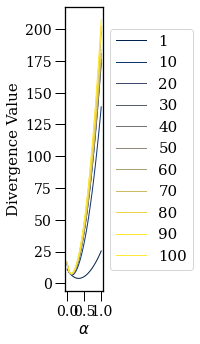

Plotting data for divergence = tdGJS on MNIST:
min at epoch 1 is at 0.19
min at epoch 10 is at 0.09
min at epoch 20 is at 0.08
min at epoch 30 is at 0.08
min at epoch 40 is at 0.08
min at epoch 50 is at 0.08
min at epoch 60 is at 0.07
min at epoch 70 is at 0.07
min at epoch 80 is at 0.07
min at epoch 90 is at 0.07
min at epoch 100 is at 0.07


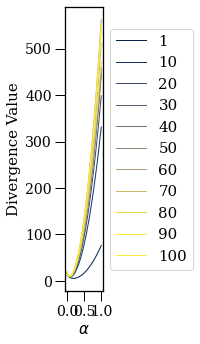

Plotting data for divergence = tGJS on FashionMNIST:
min at epoch 1 is at 0.33
min at epoch 10 is at 0.18
min at epoch 20 is at 0.17
min at epoch 30 is at 0.16
min at epoch 40 is at 0.16
min at epoch 50 is at 0.17
min at epoch 60 is at 0.17
min at epoch 70 is at 0.16
min at epoch 80 is at 0.16
min at epoch 90 is at 0.16
min at epoch 100 is at 0.16


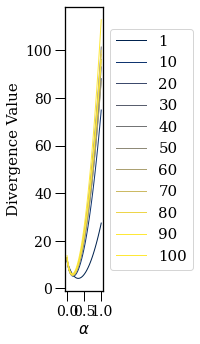

Plotting data for divergence = tdGJS on FashionMNIST:
min at epoch 1 is at 0.12
min at epoch 10 is at 0.09
min at epoch 20 is at 0.09
min at epoch 30 is at 0.08
min at epoch 40 is at 0.07
min at epoch 50 is at 0.08
min at epoch 60 is at 0.07
min at epoch 70 is at 0.07
min at epoch 80 is at 0.07
min at epoch 90 is at 0.06
min at epoch 100 is at 0.07


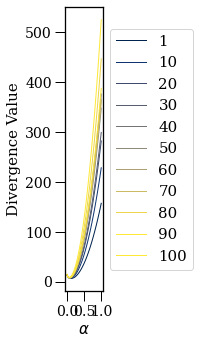

Plotting data for divergence = tGJS on dSprites:
min at epoch 1 is at 0.09
min at epoch 10 is at 0.05
min at epoch 20 is at 0.05
min at epoch 30 is at 0.05
min at epoch 40 is at 0.05
min at epoch 50 is at 0.05
min at epoch 60 is at 0.05
min at epoch 70 is at 0.04
min at epoch 80 is at 0.04
min at epoch 90 is at 0.04
min at epoch 100 is at 0.04


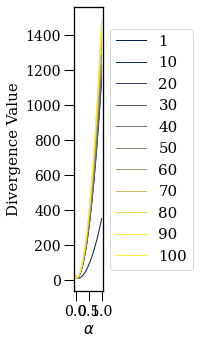

Plotting data for divergence = tdGJS on dSprites:
min at epoch 1 is at 0.04
min at epoch 10 is at 0.02
min at epoch 20 is at 0.02
min at epoch 30 is at 0.02
min at epoch 40 is at 0.02
min at epoch 50 is at 0.02
min at epoch 60 is at 0.02
min at epoch 70 is at 0.02
min at epoch 80 is at 0.02
min at epoch 90 is at 0.01
min at epoch 100 is at 0.01


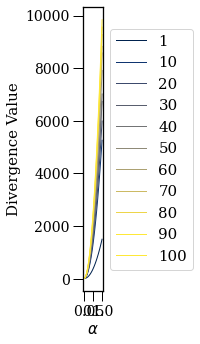

In [39]:
DIVERGENCE = 'tdGJS'
DATASET ='fashion'
SAVE = True
TIGHT_LAYOUT = True

point_of_min = pd.DataFrame(columns=['Divergence', 'Dataset', 'Epoch', 'Min-alpha', 'Min-div-value'])

for DATASET in ['mnist', 'fashion', 'dsprites']:
    for DIVERGENCE in ['tGJS', 'tdGJS']:
        print(f"Plotting data for divergence = {DIVERGENCE} on {get_name(DATASET)}:")
        data = pd.read_csv(f'./gpu-train-results/compare-alpha-vs-gjs-in-training-lr=0.0001-epochs=100/{DATASET}/{DIVERGENCE}/{DIVERGENCE}-A-0=0.5/train_losses.log')

        divergence_data = pd.DataFrame(columns=['Epoch', 'alpha','Value'])

        div_data = data.loc[data['Loss'].str.contains('storer_label_alpha_test=')]

        for epoch in range(data['Epoch'].max()+1):
            epoch_data = div_data.loc[div_data['Epoch']==epoch]
            for j in range(101):
                single_d_point = epoch_data.loc[epoch_data['Loss']==f'storer_label_alpha_test={j/100}']
                divergence_data = divergence_data.append({'Epoch': epoch,
                                                          'alpha': j/100,
                                                          'Value': single_d_point['Value'].iloc[0]}, ignore_index=True)

        fig = plt.figure(figsize=(10,10))

        for i in range(101):
            if ((i + 1) % 10 == 0) or (i == 0):
                data = divergence_data.loc[divergence_data['Epoch'] == i]
                plt.plot(data['alpha'], data['Value'], label=f'{i + 1}', color=cmap(i*3), linewidth=1)
                print(f"min at epoch {i+1} is at {data.sort_values('Value')['alpha'].iloc[0]}")
                point_of_min = point_of_min.append({'Divergence': DIVERGENCE,
                                                    'Dataset': get_name(DATASET),
                                                    'Epoch': i + 1,
                                                    'Min-alpha': data.sort_values('Value')['alpha'].iloc[0],
                                                    'Min-div-value': data.sort_values('Value')['Value'].iloc[0]}, ignore_index=True)

        plt.xlabel(r'$\alpha$')
        plt.xticks(np.arange(0, 1.1, 0.1))
        plt.ylabel('Divergence Value')
        plt.legend()


        if TIGHT_LAYOUT:
            plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)
            if SAVE:
                plt.savefig(f"figures/divergence-vs-alpha-during-train-w-learning-alpha/{DIVERGENCE}-vs-alpha-vs-epochs-{get_name(DATASET)}-tight-layout.png", dpi=200)
        else:
            plt.title(f'Divergence Value vs Alpha, {DIVERGENCE}, {get_name(DATA_SET)}.')
            if SAVE:
                plt.savefig(f"figures/divergence-vs-alpha-during-train-w-learning-alpha/{DIVERGENCE}-vs-alpha-divergence-value-vs-epochs-{get_name(DATASET)}.png")

        plt.show()

In [19]:
point_of_min.to_csv('./processed-results/point-of-divergence-min-in-alpha.csv', index=False)

In [19]:
point_of_min = pd.read_csv('./processed-results/point-of-divergence-min-in-alpha.csv')

Average learnt alpha value: 0.0 ± 0.0
Average learnt alpha value: 0.68 ± 0.005


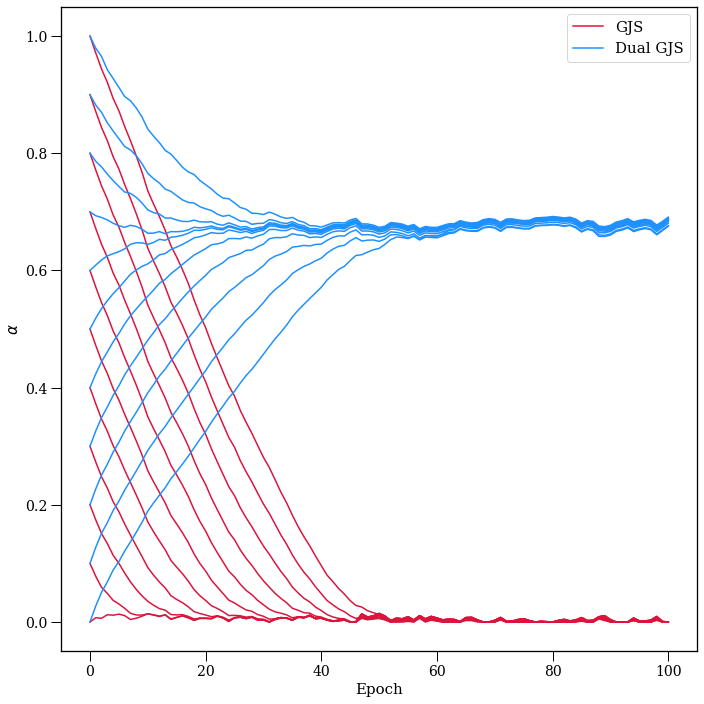

In [37]:
TRAIN_DATA_FOLDER = './gpu-train-results/alpha-experiments/synthetic-experiments/18-6-100-0.0001-100'
SAVE = True
TIGHT_LAYOUT = True
DIVERGENCE = 'tGJS'

av_a = []
fig = plt.figure(figsize=(10,10))
for initial_a in [i/10 for i in range(10)]:
    try:
        data = pd.read_csv(f"{TRAIN_DATA_FOLDER}/{DIVERGENCE}-A_0={initial_a}/train_losses.log")
        data['Epoch'] += 1
        data = data.append({'Epoch': 0,
                 'Loss': 'alpha',
                 'Value': initial_a}, ignore_index=True)
        data.sort_values('Epoch', inplace=True)
        av_a.append(data.loc[data['Loss']=='alpha']['Value'].iloc[-1])
        plt.plot(data.loc[data['Loss']=='alpha']['Epoch'], data.loc[data['Loss']=='alpha']['Value'], color='crimson')
    except:
        continue

data = pd.read_csv(f"{TRAIN_DATA_FOLDER}/{DIVERGENCE}-A_0=1.0/train_losses.log")
data['Epoch'] += 1
data = data.append({'Epoch': 0,
         'Loss': 'alpha',
         'Value': 1.0}, ignore_index=True)
data.sort_values('Epoch', inplace=True)
av_a.append(data.loc[data['Loss']=='alpha']['Value'].iloc[-1])
plt.plot(data.loc[data['Loss']=='alpha']['Epoch'], data.loc[data['Loss']=='alpha']['Value'], label='GJS', color='crimson')

print(f"Average learnt alpha value: {np.mean(av_a)} ± {np.max(av_a)}")
        
        
DIVERGENCE = 'tdGJS'

av_a = []
# fig = plt.figure(figsize=(10,10))
for initial_a in [i/10 for i in range(10)]:
    try:
        data = pd.read_csv(f"{TRAIN_DATA_FOLDER}/{DIVERGENCE}-A_0={initial_a}/train_losses.log")
        data['Epoch'] += 1
        data = data.append({'Epoch': 0,
                 'Loss': 'alpha',
                 'Value': initial_a}, ignore_index=True)
        data.sort_values('Epoch', inplace=True)
        av_a.append(data.loc[data['Loss']=='alpha']['Value'].iloc[-1])
        plt.plot(data.loc[data['Loss']=='alpha']['Epoch'], data.loc[data['Loss']=='alpha']['Value'], color='dodgerblue')
    except:
        continue
        
data = pd.read_csv(f"{TRAIN_DATA_FOLDER}/{DIVERGENCE}-A_0=1.0/train_losses.log")
data['Epoch'] += 1
data = data.append({'Epoch': 0,
         'Loss': 'alpha',
         'Value': 1.0}, ignore_index=True)
data.sort_values('Epoch', inplace=True)
av_a.append(data.loc[data['Loss']=='alpha']['Value'].iloc[-1])
plt.plot(data.loc[data['Loss']=='alpha']['Epoch'], data.loc[data['Loss']=='alpha']['Value'], color='dodgerblue', label='Dual GJS')
print(f"Average learnt alpha value: {np.mean(av_a).round(2)} ± {np.std(av_a).round(3)}")
        
plt.legend()
plt.xlabel('Epoch')
plt.ylabel(r'$\alpha$')
if TIGHT_LAYOUT:
    plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)
    if SAVE:
        plt.savefig("figures/train-alpha-experiments/synthetic-experiments/18-6-100-0.0001-100/GJS-comparison-alpha-vs-epoch-tight-layout.png", dpi=200)
else:
    plt.title('Alpha vs Epoch, GJS Divergence and it Dual, Synthetic Gaussian Data.')
    if SAVE:
        plt.savefig("figures/train-alpha-experiments/synthetic-experiments/18-6-100-0.0001-100/GJS-comparison-alpha-vs-epoch.png", dpi=200)
plt.show()

Average final alpha for GJS trained on mnist: 0.12 ± 0.0007


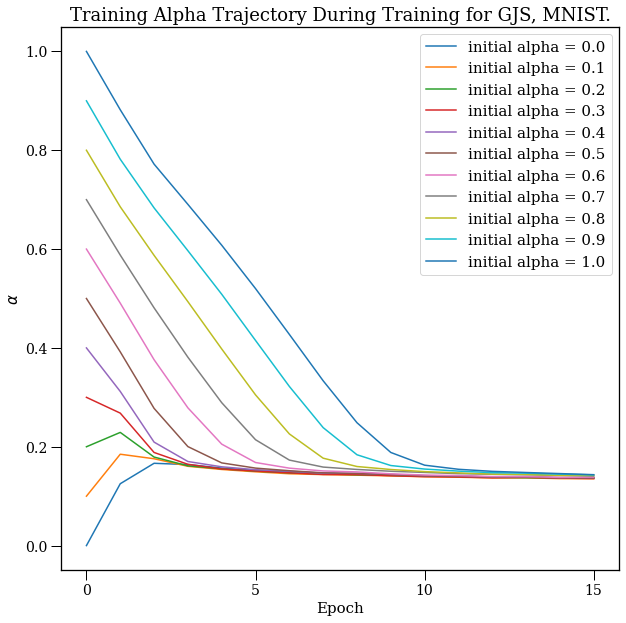

Average final alpha for dGJS trained on mnist: 0.36 ± 0.0005


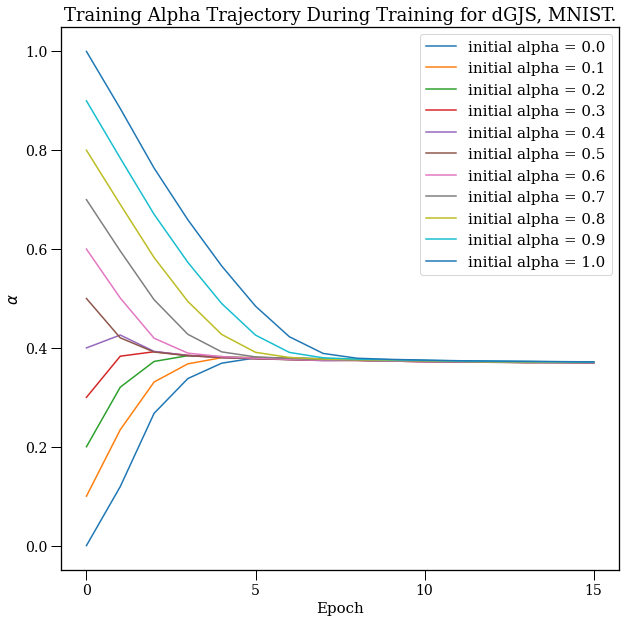

Average final alpha for GJS trained on fashion: 0.16 ± 0.009


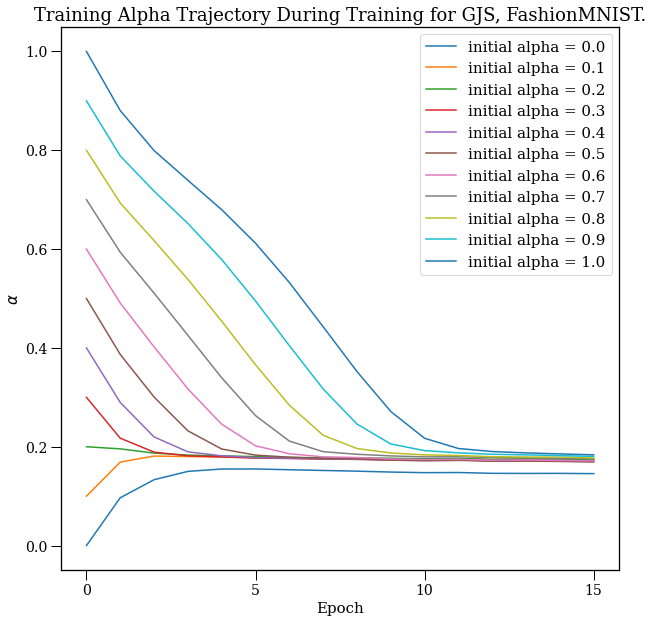

Average final alpha for dGJS trained on fashion: 0.38 ± 0.0012


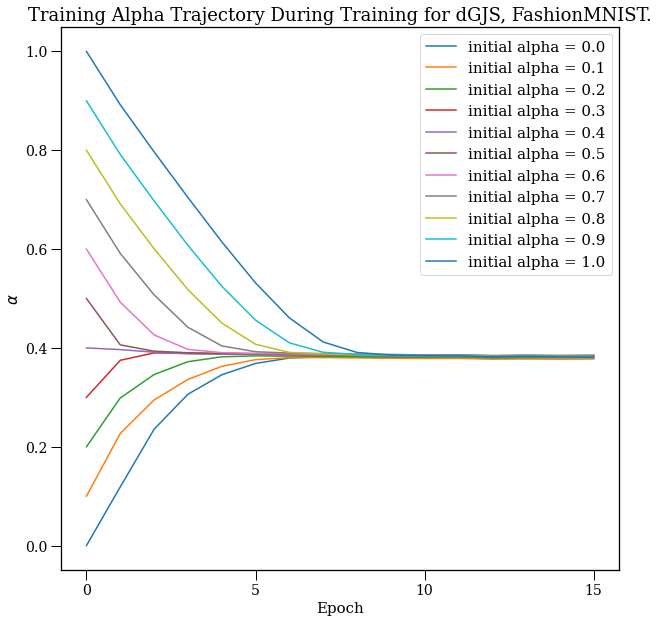

Average final alpha for GJS trained on dsprites: 0.05 ± 0.0007


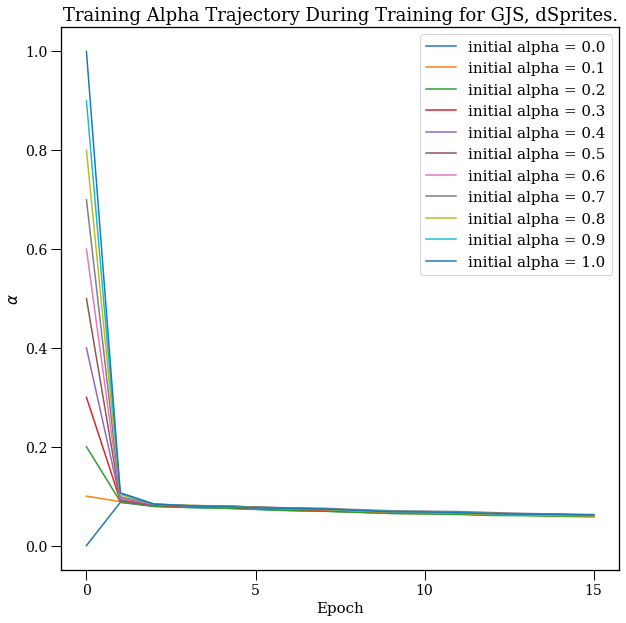

Average final alpha for dGJS trained on dsprites: 0.32 ± 0.0005


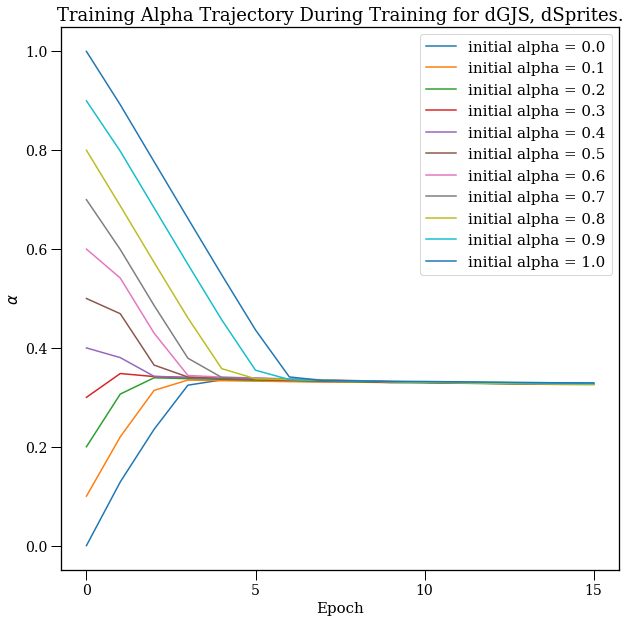

In [45]:
TRAIN_DATA_FOLDER = './gpu-train-results/alpha-experiments'
# TRAIN_DATA_FOLDER = './gpu-train-results/synthetic-experiments/202-7-100-1e-05-50'
DATA_SET = 'dsprites'
DIVERGENCE = 'dGJS'
TIGHT_LAYOUT = False
SAVE = False

learnt_alpha_value = pd.DataFrame(columns=['Divergence','Dataset','Epochs','mean-alpha','std-alpha','mean-final-div','std-final-div'])

for DATASET in ['mnist', 'fashion', 'dsprites']:
    for DIVERGENCE in ['GJS', 'dGJS']:
        
        av_a = []
        av_loss = []
        fig = plt.figure(figsize=(10,10))
        for initial_a in [i/10 for i in range(11)]:
            try:
                data = pd.read_csv(f"{TRAIN_DATA_FOLDER}/{DATASET}/{DIVERGENCE}/{DIVERGENCE}-A_0={initial_a}/train_losses.log")
                data['Epoch'] += 1
                data = data.append({'Epoch': 0,
                         'Loss': 'alpha',
                         'Value': initial_a}, ignore_index=True)
                data.sort_values('Epoch', inplace=True)
                av_a.append(data.loc[data['Loss']=='alpha']['Value'].iloc[-1])
                av_loss.append(data.loc[data['Loss']=='recon_loss']['Value'].iloc[-1])
                plt.plot(data.loc[data['Loss']=='alpha']['Epoch'].iloc[:16], data.loc[data['Loss']=='alpha']['Value'].iloc[:16], label=f"initial alpha = {initial_a}")
            except:
                continue

        print(f"Average final alpha for {DIVERGENCE} trained on {DATASET}: {np.mean(av_a).round(2)} ± {np.std(av_a).round(4)}")
        learnt_alpha_value = learnt_alpha_value.append({'Divergence': DIVERGENCE,
                                                        'Dataset': get_name(DATASET),
                                                        'Epochs': data.Epoch.max(),
                                                        'mean-alpha': np.mean(av_a).round(2),
                                                        'std-alpha': np.std(av_a).round(4),
                                                        'mean-final-div': np.mean(av_loss).round(2),
                                                        'std-final-div': np.std(av_loss).round(4)}, ignore_index=True)

        # Plot:
        plt.legend()
        plt.xlabel('Epoch')
        plt.xticks(np.arange(0, 16, 5.0))
        plt.ylabel(r'$\alpha$')

        if TIGHT_LAYOUT:
            plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)
            if SAVE:
                plt.savefig(f"figures/train-alpha-experiments/{DATASET}/{DIVERGENCE}/{DIVERGENCE}-alpha-training-trajectory-vs-initial-a-{get_name(DATASET)}-tight-layout.png", dpi=200)
        else:
            plt.title(f'Training Alpha Trajectory During Training for {DIVERGENCE}, {get_name(DATASET)}.')
            if SAVE:
                plt.savefig(f"figures/train-alpha-experiments/{DATASET}/{DIVERGENCE}/{DIVERGENCE}-alpha-training-trajectory-vs-initial-a-{get_name(DATASET)}.png", dpi=200)
        plt.show()

In [47]:
learnt_alpha_value.to_csv('./processed-results/learnt-alpha-values.csv', index=False)

In [41]:
pd.read_csv('./processed-results/learnt-alpha-values.csv')

,Divergence,Dataset,Epochs,mean-alpha,std-alpha,mean-final-div,std-final-div
0,GJS,MNIST,100,0.12,0.0007,11.21,0.0514
1,dGJS,MNIST,100,0.36,0.0005,9.75,0.0369
2,GJS,FashionMNIST,100,0.16,0.0090,11.89,0.0311
3,dGJS,FashionMNIST,100,0.38,0.0012,10.82,0.0210
4,GJS,dSprites,50,0.05,0.0007,11.00,0.1249
5,dGJS,dSprites,50,0.32,0.0005,9.10,0.0864


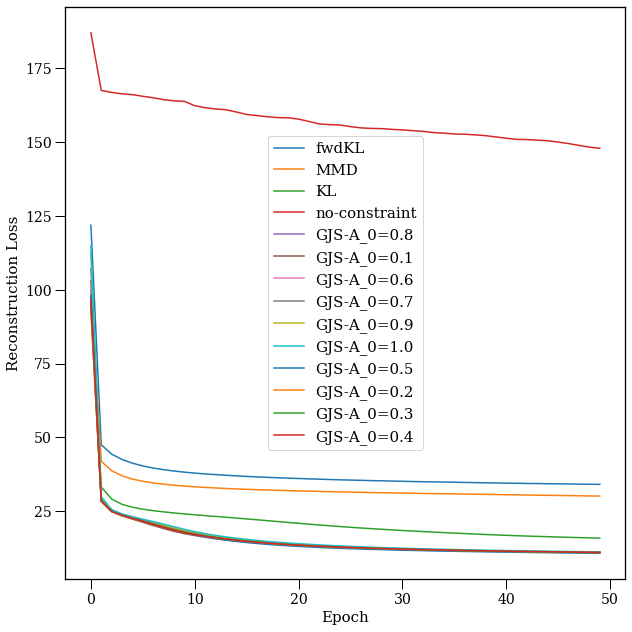

In [298]:
DATA_SET = 'dsprites'
DIVERGENCE = 'GJS'
TIGHT_LAYOUT = True
SAVE = False

reconstruction_loss = pd.DataFrame(columns=['Divergence','Dataset','Epochs','mean-final-reconstruction-loss','std-final-reconstruction-loss'])

fig = plt.figure(figsize=(9,9))
for name in os.listdir(f"{DATA_LOC}/{DATA_SET}/{DIVERGENCE}"):
    try:
        data = pd.read_csv(f"{DATA_LOC}/{DATA_SET}/{DIVERGENCE}/{name}/train_losses.log")
        plt.plot(data.loc[data['Loss']=='recon_loss']['Epoch'], data.loc[data['Loss']=='recon_loss']['Value'], label=name)
    except:
        continue
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Reconstruction Loss')
if TIGHT_LAYOUT:
    plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)
    if SAVE:
        plt.savefig(f"figures/train-alpha-experiments/{DATA_SET}/{DIVERGENCE}/{DIVERGENCE}-recon-loss-vs-epoch-MNIST-tight-layout.pdf")
else:
    plt.title('Comparison of Training Reconstruction Losses')
    if SAVE:
        plt.savefig(f"figures/train-alpha-experiments/{DATA_SET}/{DIVERGENCE}/{DIVERGENCE}-recon-loss-vs-epoch-MNIST.pdf")
plt.show()

mnist train:
Average final recon-loss train set for dGJS on mnist 7.92 ± 0.03
Average final recon-loss train set for GJS on mnist 8.45 ± 0.06


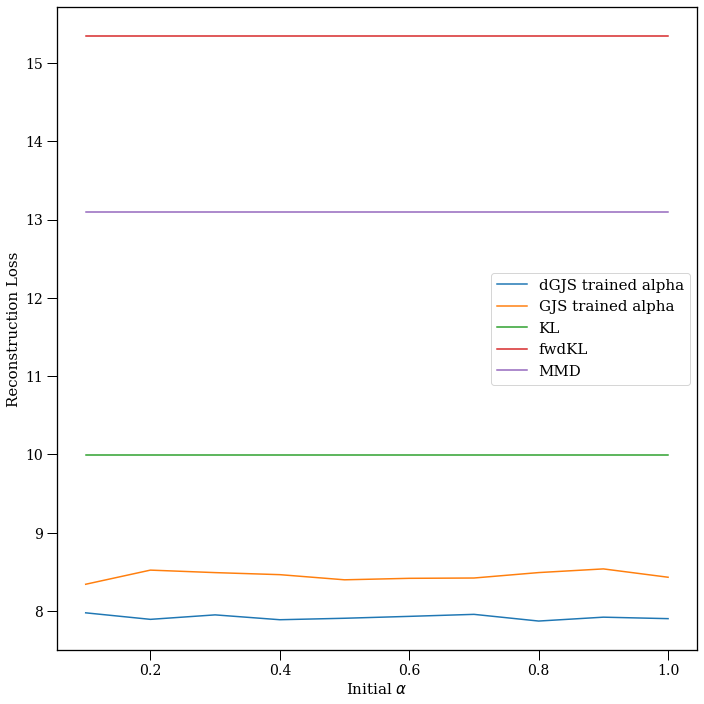

mnist test:
Average final recon-loss train set for dGJS on mnist 8.54 ± 0.03
Average final recon-loss train set for GJS on mnist 8.98 ± 0.06


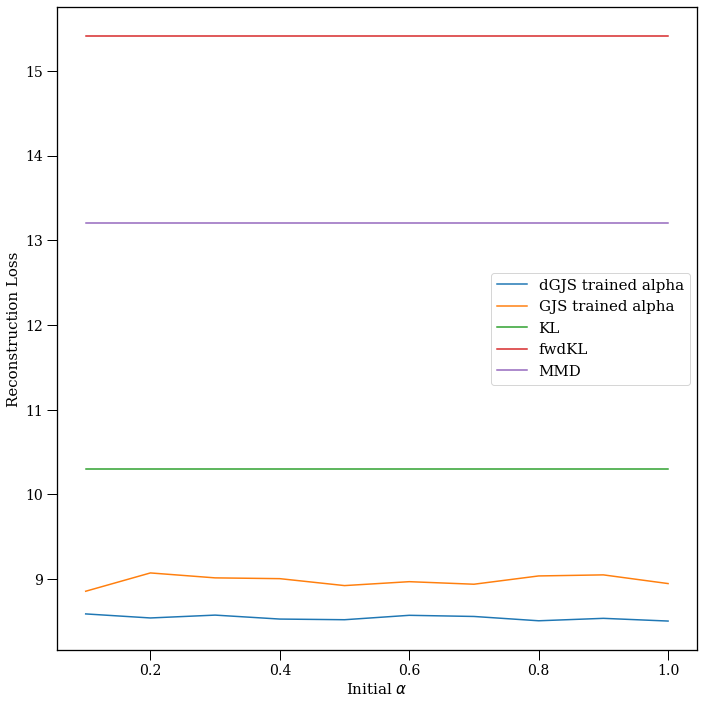

fashion train:
Average final recon-loss train set for dGJS on fashion 9.19 ± 0.04
Average final recon-loss train set for GJS on fashion 9.5 ± 0.02


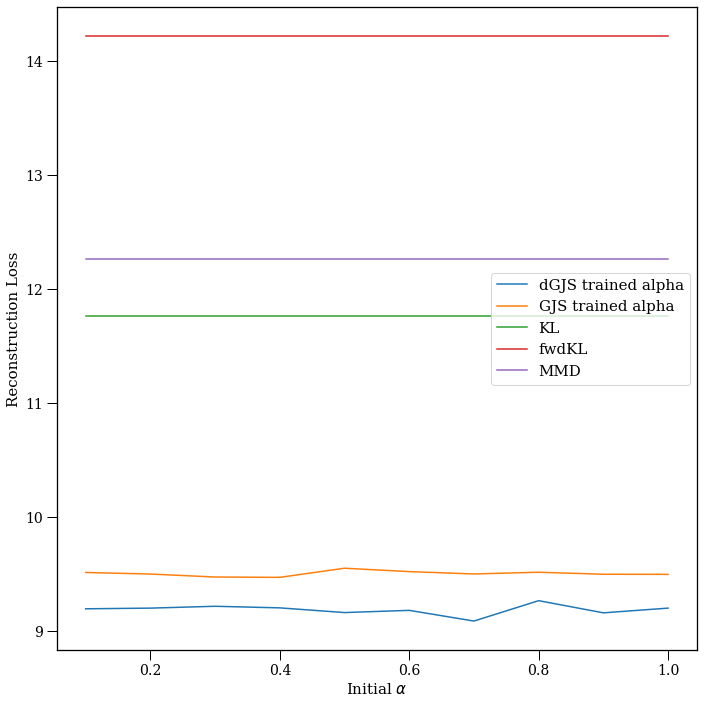

fashion test:
Average final recon-loss train set for dGJS on fashion 9.62 ± 0.05
Average final recon-loss train set for GJS on fashion 9.89 ± 0.02


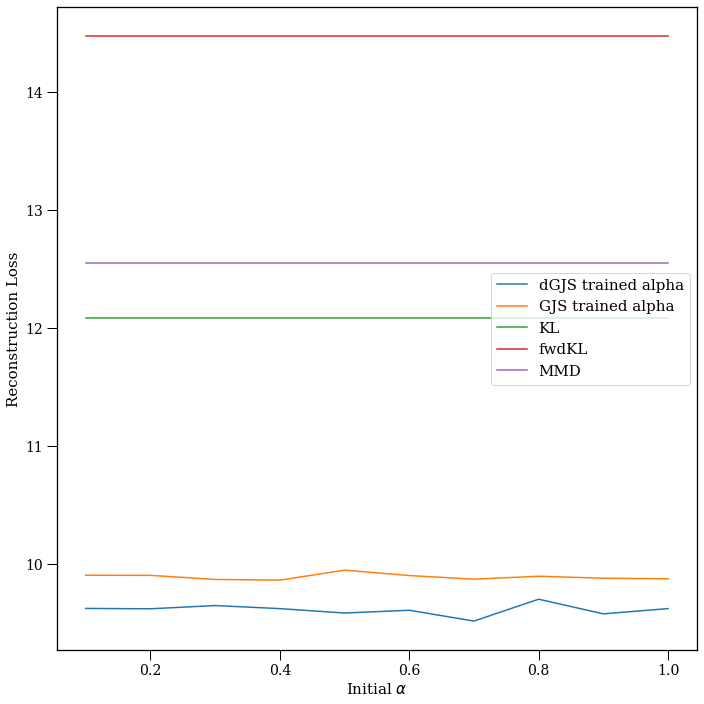

dsprites train:
Average final recon-loss train set for dGJS on dsprites 7.36 ± 0.09
Average final recon-loss train set for GJS on dsprites 8.07 ± 0.1


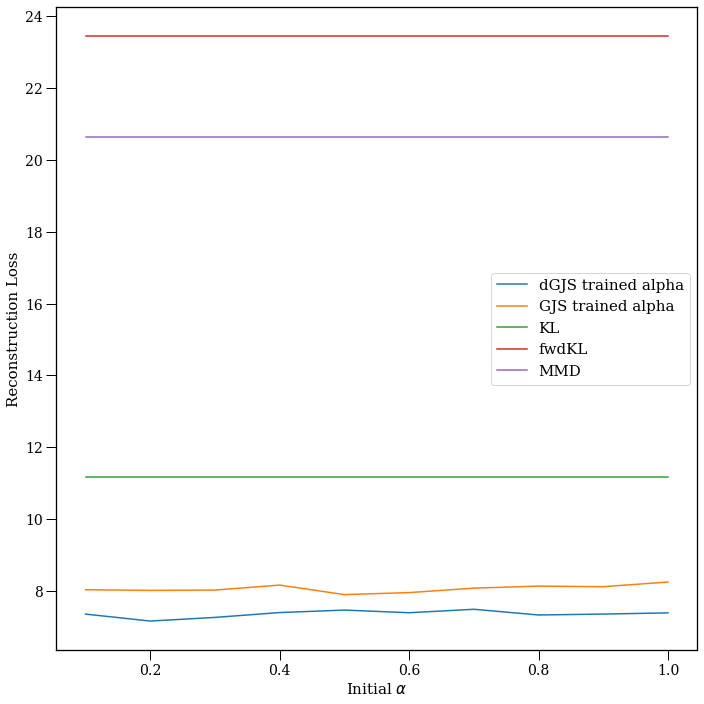

dsprites test:
Average final recon-loss train set for dGJS on dsprites 7.36 ± 0.09
Average final recon-loss train set for GJS on dsprites 8.07 ± 0.1


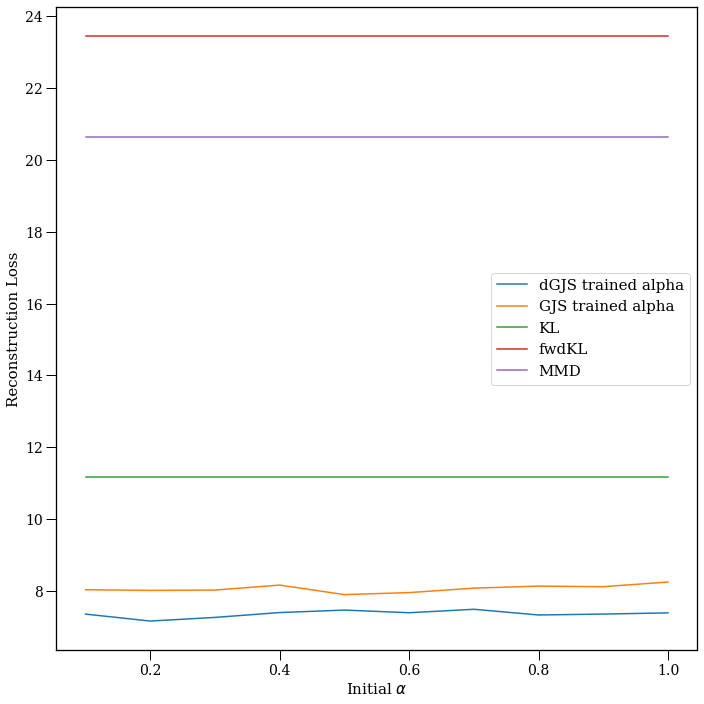

In [9]:
# Plot Options:
DATA_LOC = './gpu-train-results/alpha-experiments'

tight_layout = True
DATASET = 'mnist'
SET = 'train'
SAVE = True

# Plotting Code:
reconstruction_loss = pd.DataFrame(columns=['Divergence','Dataset','Epochs','mean-final-reconstruction-loss','std-final-reconstruction-loss'])

for DATASET in ['mnist', 'fashion', 'dsprites']:
    for SET in ['train', 'test']:
        print(f"{DATASET} {SET}:")
        fig = plt.figure(figsize=(10,10))

        # Train dataset:

        DIVERGENCE = 'dGJS'
        initial_alphas = []
        final_recon_loss = []

        for initial_a in [i/10 for i in range(1, 11)]:
            train_eval_data = json.load(open(f"{DATA_LOC}/{DATASET}/{DIVERGENCE}/{DIVERGENCE}-A_0={initial_a}/{SET}_eval.log"))
            initial_alphas.append(initial_a)
            final_recon_loss.append(train_eval_data['recon_loss'])

        plt.plot(initial_alphas, final_recon_loss, label=f"{DIVERGENCE} trained alpha")
        print(f"Average final recon-loss train set for {DIVERGENCE} on {DATASET} {np.mean(final_recon_loss).round(2)} ± {np.std(final_recon_loss).round(2)}")

        reconstruction_loss = reconstruction_loss.append({'Divergence': DIVERGENCE,
                                                         'Dataset': f"{DATASET}-{SET}",
                                                         'Epochs':  json.load(open(f"{DATA_LOC}/{DATASET}/{DIVERGENCE}/{DIVERGENCE}-A_0={initial_a}/specs.json"))['epochs'],
                                                         'mean-final-reconstruction-loss': np.mean(final_recon_loss).round(2),
                                                         'std-final-reconstruction-loss': np.std(final_recon_loss).round(2)}, ignore_index=True)

        DIVERGENCE = 'GJS'
        initial_alphas = []
        final_recon_loss = []

        for initial_a in [i/10 for i in range(1, 11)]:
            train_eval_data = json.load(open(f"{DATA_LOC}/{DATASET}/{DIVERGENCE}/{DIVERGENCE}-A_0={initial_a}/{SET}_eval.log"))
            initial_alphas.append(initial_a)
            final_recon_loss.append(train_eval_data['recon_loss'])

        plt.plot(initial_alphas, final_recon_loss, label=f"{DIVERGENCE} trained alpha")
        print(f"Average final recon-loss train set for {DIVERGENCE} on {DATASET} {np.mean(final_recon_loss).round(2)} ± {np.std(final_recon_loss).round(2)}")
        reconstruction_loss = reconstruction_loss.append({'Divergence': DIVERGENCE,
                                                         'Dataset': f"{DATASET}-{SET}",
                                                         'Epochs':  json.load(open(f"{DATA_LOC}/{DATASET}/{DIVERGENCE}/{DIVERGENCE}-A_0={initial_a}/specs.json"))['epochs'],
                                                         'mean-final-reconstruction-loss': np.mean(final_recon_loss).round(2),
                                                         'std-final-reconstruction-loss': np.std(final_recon_loss).round(2)}, ignore_index=True)

        #KL
        data = json.load(open(f"{DATA_LOC}/{DATASET}/{DIVERGENCE}/KL/{SET}_eval.log"))
        recon_loss = [data['recon_loss']] * 10
        plt.plot(initial_alphas, recon_loss, label=f"KL")
        reconstruction_loss = reconstruction_loss.append({'Divergence': 'KL',
                                                         'Dataset': f"{DATASET}-{SET}",
                                                         'Epochs':  json.load(open(f"{DATA_LOC}/{DATASET}/{DIVERGENCE}/KL/specs.json"))['epochs'],
                                                         'mean-final-reconstruction-loss': data['recon_loss'],
                                                         'std-final-reconstruction-loss': 0}, ignore_index=True)

        #fwdKL:
        data = json.load(open(f"{DATA_LOC}/{DATASET}/{DIVERGENCE}/fwdKL/{SET}_eval.log"))
        recon_loss = [data['recon_loss']] * 10
        plt.plot(initial_alphas, recon_loss, label=f"fwdKL")
        reconstruction_loss = reconstruction_loss.append({'Divergence': 'fwdKL',
                                                         'Dataset': f"{DATASET}-{SET}",
                                                         'Epochs':  json.load(open(f"{DATA_LOC}/{DATASET}/{DIVERGENCE}/fwdKL/specs.json"))['epochs'],
                                                         'mean-final-reconstruction-loss': data['recon_loss'],
                                                         'std-final-reconstruction-loss': 0}, ignore_index=True)

#         if DATASET != 'dsprites':
#             #no constraint:
#             data = json.load(open(f"{DATA_LOC}/{DATASET}/{DIVERGENCE}/no-constraint/{SET}_eval.log"))
#             recon_loss = [data['recon_loss']] * 10
#             plt.plot(initial_alphas, recon_loss, label=f"no constraint")
#             reconstruction_loss = reconstruction_loss.append({'Divergence': 'no-constraint',
#                                                          'Dataset': f"{DATASET}-{SET}",
#                                                          'Epochs':  json.load(open(f"{DATA_LOC}/{DATASET}/{DIVERGENCE}/no-constraint/specs.json"))['epochs'],
#                                                          'mean-final-reconstruction-loss': data['recon_loss'],
#                                                          'std-final-reconstruction-loss': 0}, ignore_index=True)
#         else:
#             data = json.load(open(f"{DATA_LOC}/{DATASET}/{DIVERGENCE}/no-constraint/{SET}_eval.log"))
#             recon_loss = [data['recon_loss']] * 10
# #             plt.plot(initial_alphas, recon_loss, label=f"no constraint")
#             reconstruction_loss = reconstruction_loss.append({'Divergence': 'no-constraint',
#                                                          'Dataset': f"{DATASET}-{SET}",
#                                                          'Epochs':  json.load(open(f"{DATA_LOC}/{DATASET}/{DIVERGENCE}/no-constraint/specs.json"))['epochs'],
#                                                          'mean-final-reconstruction-loss': data['recon_loss'],
#                                                          'std-final-reconstruction-loss': 0}, ignore_index=True)

        #MMD:
        data = json.load(open(f"{DATA_LOC}/{DATASET}/{DIVERGENCE}/MMD/{SET}_eval.log"))
        recon_loss = [data['recon_loss']] * 10
        plt.plot(initial_alphas, recon_loss, label=f"MMD")
        reconstruction_loss = reconstruction_loss.append({'Divergence': 'MMD',
                                                         'Dataset': f"{DATASET}-{SET}",
                                                         'Epochs':  json.load(open(f"{DATA_LOC}/{DATASET}/{DIVERGENCE}/MMD/specs.json"))['epochs'],
                                                         'mean-final-reconstruction-loss': data['recon_loss'],
                                                         'std-final-reconstruction-loss': 0}, ignore_index=True)


        plt.legend(loc='center right')
        plt.ylabel('Reconstruction Loss')
        plt.xlabel(r"Initial $\alpha$")

        if tight_layout:
            plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)
            if SAVE:
                plt.savefig(f"figures/train-alpha-experiments/{DATASET}/{DIVERGENCE}/{DIVERGENCE}-recon-loss-vs-initial-a-{SET}-dataset-{get_name(DATASET)}-tight-layout.png", dpi=200)
        else:
            plt.title(f'Final Model Reconstruction Loss vs Initial Alpha, {DIVERGENCE} {get_name(DATASET)} Train Data Set.')
            if SAVE:
                plt.savefig(f"figures/train-alpha-experiments/{DATASET}/{DIVERGENCE}/{DIVERGENCE}-recon-loss-vs-initial-a-{SET}-dataset-{get_name(DATASET)}.png", dpi=200)
        plt.show()


In [64]:
reconstruction_loss.to_csv('./processed-results/reconstruction-vs-divergence.csv', index=False)

In [13]:
reconstruction_loss.loc[reconstruction_loss['Dataset']=='dsprites-test']

,Divergence,Dataset,Epochs,mean-final-reconstruction-loss,std-final-reconstruction-loss
25,dGJS,dsprites-test,50,7.360000,0.09
26,GJS,dsprites-test,50,8.070000,0.10
27,KL,dsprites-test,50,11.180124,0.00
28,fwdKL,dsprites-test,50,23.449502,0.00
29,MMD,dsprites-test,50,20.652878,0.00


In [79]:
DATA_LOC = './gpu-train-results/2-5-IntegrativeCNCVAE-lr=0.0001-epochs=500'

# Plot Options:
# DATA_LOC = './gpu-train-results/alpha-experiments'

tight_layout = True
DATASET = 'dsprites'
SET = 'train'
SAVE = True

# Plotting Code:
reconstruction_loss = pd.DataFrame(columns=['Divergence','Dataset','Epochs','mean-final-reconstruction-loss','std-final-reconstruction-loss'])

for DATASET in ['IntegrativeCNCVAE']:
    for SET in ['train']:
        fig = plt.figure(figsize=(10,10))

        # Train dataset:

        DIVERGENCE = 'tdGJS'
        initial_alphas = []
        final_recon_loss = []

        for initial_a in [i/10 for i in range(1, 11)]:
            train_eval_data = json.load(open(f"{DATA_LOC}/{DATASET}/{DIVERGENCE}/{DIVERGENCE}-A_0={initial_a}/train_losses.log"))
            initial_alphas.append(initial_a)
            final_recon_loss.append(train_eval_data['recon_loss'])

        plt.plot(initial_alphas, final_recon_loss, label=f"{DIVERGENCE} trained alpha")
        print(f"Average final recon-loss train set for {DIVERGENCE} on {DATASET} {np.mean(final_recon_loss).round(2)} ± {np.std(final_recon_loss).round(2)}")

        reconstruction_loss = reconstruction_loss.append({'Divergence': DIVERGENCE,
                                                         'Dataset': f"{DATASET}-{SET}",
                                                         'Epochs':  json.load(open(f"{DATA_LOC}/{DATASET}/{DIVERGENCE}/{DIVERGENCE}-A_0={initial_a}/specs.json"))['epochs'],
                                                         'mean-final-reconstruction-loss': np.mean(final_recon_loss).round(2),
                                                         'std-final-reconstruction-loss': np.std(final_recon_loss).round(2)}, ignore_index=True)

        DIVERGENCE = 'GJS'
        initial_alphas = []
        final_recon_loss = []

        for initial_a in [i/10 for i in range(1, 11)]:
            train_eval_data = json.load(open(f"{DATA_LOC}/{DATASET}/{DIVERGENCE}/{DIVERGENCE}-A_0={initial_a}/{SET}_eval.log"))
            initial_alphas.append(initial_a)
            final_recon_loss.append(train_eval_data['recon_loss'])

        plt.plot(initial_alphas, final_recon_loss, label=f"{DIVERGENCE} trained alpha")
        print(f"Average final recon-loss train set for {DIVERGENCE} on {DATASET} {np.mean(final_recon_loss).round(2)} ± {np.std(final_recon_loss).round(2)}")
        reconstruction_loss = reconstruction_loss.append({'Divergence': DIVERGENCE,
                                                         'Dataset': f"{DATASET}-{SET}",
                                                         'Epochs':  json.load(open(f"{DATA_LOC}/{DATASET}/{DIVERGENCE}/{DIVERGENCE}-A_0={initial_a}/specs.json"))['epochs'],
                                                         'mean-final-reconstruction-loss': np.mean(final_recon_loss).round(2),
                                                         'std-final-reconstruction-loss': np.std(final_recon_loss).round(2)}, ignore_index=True)

        #KL
        data = json.load(open(f"{DATA_LOC}/{DATASET}/{DIVERGENCE}/KL/{SET}_eval.log"))
        recon_loss = [data['recon_loss']] * 10
        plt.plot(initial_alphas, recon_loss, label=f"KL")
        reconstruction_loss = reconstruction_loss.append({'Divergence': 'KL',
                                                         'Dataset': f"{DATASET}-{SET}",
                                                         'Epochs':  json.load(open(f"{DATA_LOC}/{DATASET}/{DIVERGENCE}/KL/specs.json"))['epochs'],
                                                         'mean-final-reconstruction-loss': data['recon_loss'],
                                                         'std-final-reconstruction-loss': 0}, ignore_index=True)

        #fwdKL:
        data = json.load(open(f"{DATA_LOC}/{DATASET}/{DIVERGENCE}/fwdKL/{SET}_eval.log"))
        recon_loss = [data['recon_loss']] * 10
        plt.plot(initial_alphas, recon_loss, label=f"fwdKL")
        reconstruction_loss = reconstruction_loss.append({'Divergence': 'fwdKL',
                                                         'Dataset': f"{DATASET}-{SET}",
                                                         'Epochs':  json.load(open(f"{DATA_LOC}/{DATASET}/{DIVERGENCE}/fwdKL/specs.json"))['epochs'],
                                                         'mean-final-reconstruction-loss': data['recon_loss'],
                                                         'std-final-reconstruction-loss': 0}, ignore_index=True)

        if data_set != 'dsprites':
            #no constraint:
            data = json.load(open(f"{DATA_LOC}/{DATASET}/{DIVERGENCE}/no-constraint/{SET}_eval.log"))
            recon_loss = [data['recon_loss']] * 10
            plt.plot(initial_alphas, recon_loss, label=f"no constraint")
            reconstruction_loss = reconstruction_loss.append({'Divergence': 'no-constraint',
                                                         'Dataset': f"{DATASET}-{SET}",
                                                         'Epochs':  json.load(open(f"{DATA_LOC}/{DATASET}/{DIVERGENCE}/no-constraint/specs.json"))['epochs'],
                                                         'mean-final-reconstruction-loss': data['recon_loss'],
                                                         'std-final-reconstruction-loss': 0}, ignore_index=True)
        else:
            data = json.load(open(f"{DATA_LOC}/{DATASET}/{DIVERGENCE}/no-constraint/{SET}_eval.log"))
            recon_loss = [data['recon_loss']] * 10
#             plt.plot(initial_alphas, recon_loss, label=f"no constraint")
            reconstruction_loss = reconstruction_loss.append({'Divergence': 'no-constraint',
                                                         'Dataset': f"{DATASET}-{SET}",
                                                         'Epochs':  json.load(open(f"{DATA_LOC}/{DATASET}/{DIVERGENCE}/no-constraint/specs.json"))['epochs'],
                                                         'mean-final-reconstruction-loss': data['recon_loss'],
                                                         'std-final-reconstruction-loss': 0}, ignore_index=True)

        #MMD:
        data = json.load(open(f"{DATA_LOC}/{DATASET}/{DIVERGENCE}/MMD/{SET}_eval.log"))
        recon_loss = [data['recon_loss']] * 10
        plt.plot(initial_alphas, recon_loss, label=f"MMD")
        reconstruction_loss = reconstruction_loss.append({'Divergence': 'MMD',
                                                         'Dataset': f"{DATASET}-{SET}",
                                                         'Epochs':  json.load(open(f"{DATA_LOC}/{DATASET}/{DIVERGENCE}/MMD/specs.json"))['epochs'],
                                                         'mean-final-reconstruction-loss': data['recon_loss'],
                                                         'std-final-reconstruction-loss': 0}, ignore_index=True)


        plt.legend(loc='center right')
        plt.ylabel('Reconstruction Loss')
        plt.xlabel(r"Initial $\alpha$")

        if tight_layout:
            plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)
            if SAVE:
                plt.savefig(f"figures/train-alpha-experiments/{DATASET}/{DIVERGENCE}/{DIVERGENCE}-recon-loss-vs-initial-a-{SET}-dataset-{get_name(DATASET)}-tight-layout.png", dpi=200)
        else:
            plt.title(f'Final Model Reconstruction Loss vs Initial Alpha, {DIVERGENCE} {get_name(DATASET)} Train Data Set.')
            if SAVE:
                plt.savefig(f"figures/train-alpha-experiments/{DATASET}/{DIVERGENCE}/{DIVERGENCE}-recon-loss-vs-initial-a-{SET}-dataset-{get_name(DATASET)}.png", dpi=200)
        plt.show()



FileNotFoundError: [Errno 2] No such file or directory: './gpu-train-results/2-5-IntegrativeCNCVAE-lr=0.0001-epochs=500/IntegrativeCNCVAE/tdGJS/tdGJS-A_0=0.1/train_losses.log'

<Figure size 720x720 with 0 Axes>